<a href="https://colab.research.google.com/github/vitorsmends/mharvellous-start/blob/backup/desafio_opencv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 
import numpy as np 
from skimage import io 
from google.colab.patches import cv2_imshow # Necessário para exibição de imagens no Google Colab - substitui a função original cv2.imshow() do openCV

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install until

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,670 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [172]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [190]:
local = 'desafio-visão-2-1.jpeg'
#local = 'desafio-visão-2-2.jpeg'
#local = 'desafio-visão-2-3.jpeg'

(altura, largura, canais)
(780, 1040, 3)


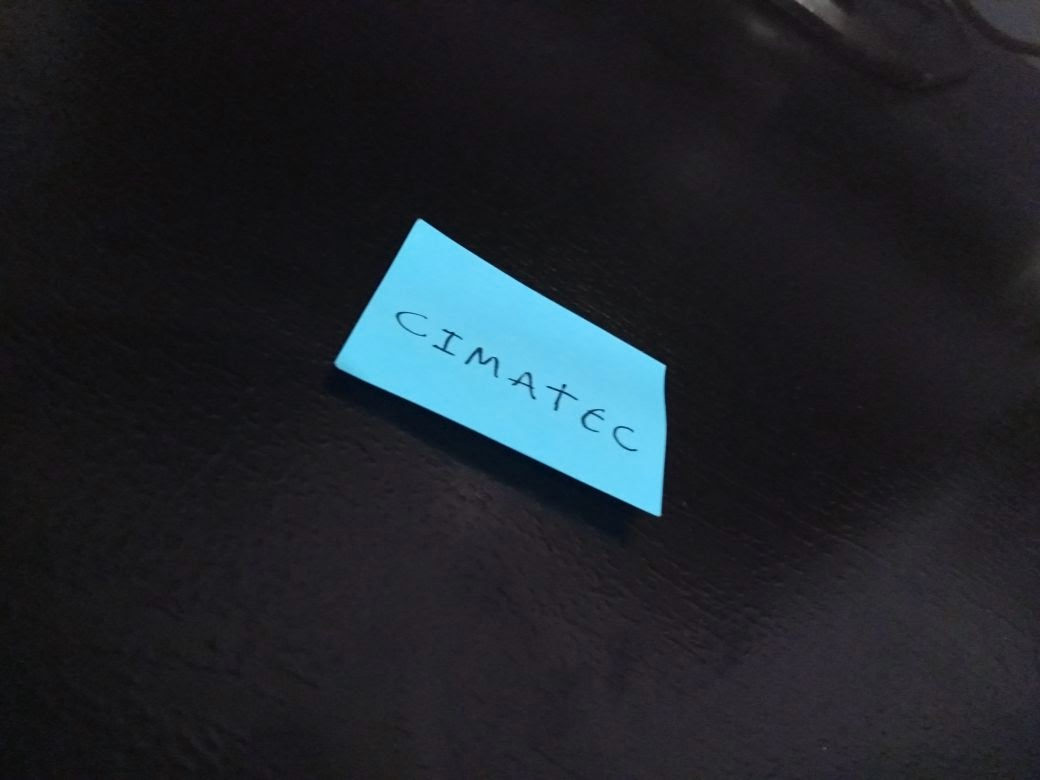

In [191]:
# Informações da imagem
img = cv2.imread(local)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Características da imagem
print("(altura, largura, canais)")
img_size = img.shape
print(img_size)

cv2_imshow(img)

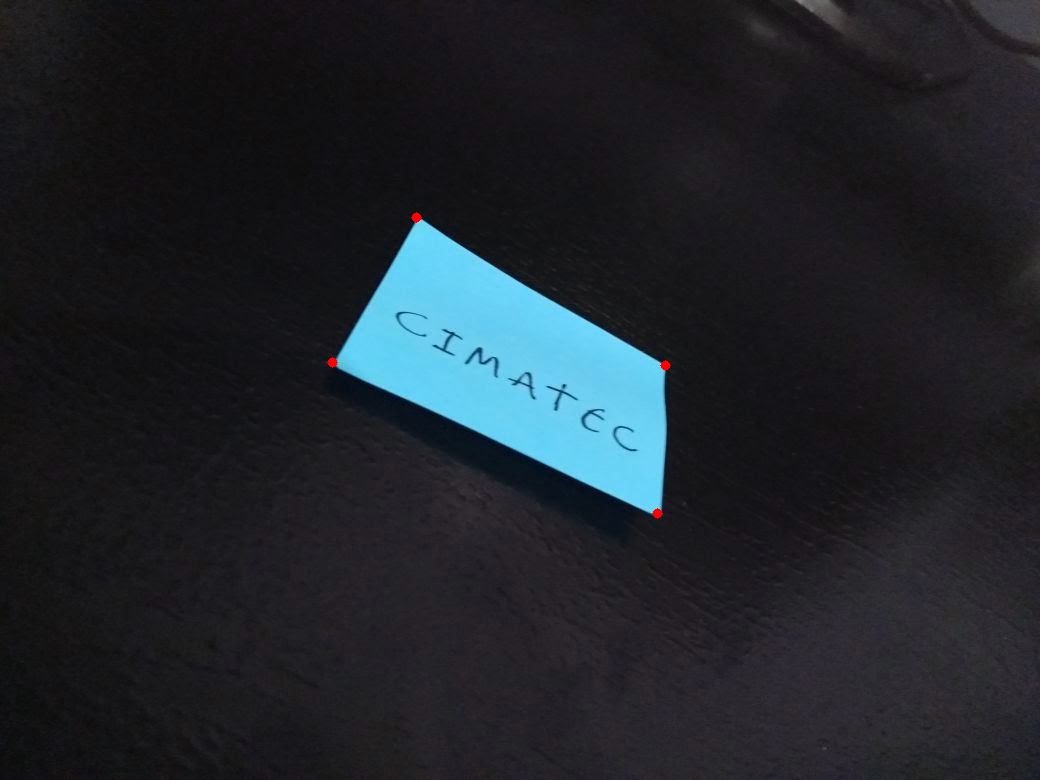

In [192]:
# Vertices
img = cv2.imread(local)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Apenas para vizualização #
# Marcação dos 4 vértices (AZUL)
if(local == 'desafio-visão-2-1.jpeg'):
   vet1 = (416,217)
   vet2 = (665,365)
   vet3 = (332,362)
   vet4 = (657,513)
   cv2.circle(img,vet1,2,(0,0,255),5) # Vértice 1
   cv2.circle(img,vet2,2,(0,0,255),5) # Vértice 2
   cv2.circle(img,vet3,2,(0,0,255),5) # Vértice 3
   cv2.circle(img,vet4,2,(0,0,255),5) # Vértice 4

elif(local == 'desafio-visão-2-2.jpeg'):
  vet1 = (460,175)
  vet2 = (650,375)
  vet3 = (245,200)
  vet4 = (430,455)
  cv2.circle(img,vet1,2,(0,0,255),5) # Vértice 1
  cv2.circle(img,vet2,2,(0,0,255),5) # Vértice 2
  cv2.circle(img,vet3,2,(0,0,255),5) # Vértice 3
  cv2.circle(img,vet4,2,(0,0,255),5) # Vértice 4


elif(local == 'desafio-visão-2-3.jpeg'):
  vet1 = (295,165)
  vet2 = (413,353)
  vet3 = (100,275)
  vet4 = (162,495)
  cv2.circle(img,vet1,2,(0,0,255),5) # Vértice 1
  cv2.circle(img,vet2,2,(0,0,255),5) # Vértice 2
  cv2.circle(img,vet3,2,(0,0,255),5) # Vértice 3
  cv2.circle(img,vet4,2,(0,0,255),5) # Vértice 4


#linhas
#cv2.line(img,vet1,vet3,(0,255,0),3)
#cv2.line(img,vet3,vet4,(0,255,0),3)
# Apenas para vizualização #

cv2_imshow(img)

84
145
167.57


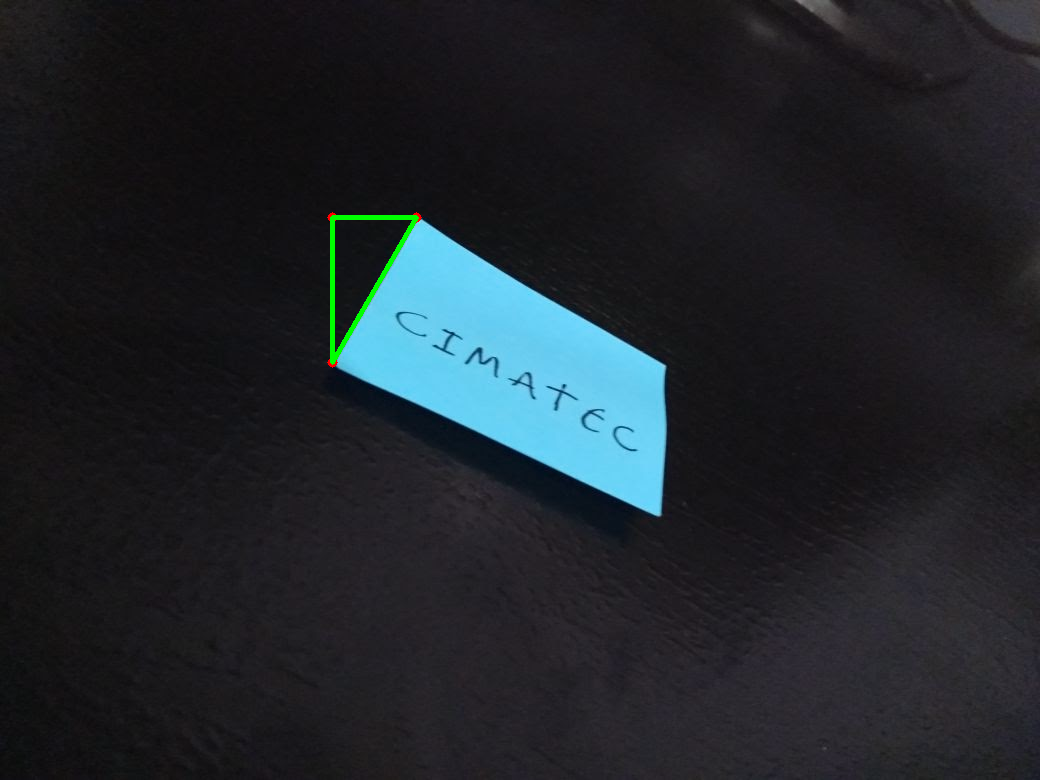

In [193]:
# Encontrando a altura da carta
import math
img = cv2.imread(local)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Encontrando um vetor auxiliar
cv2.circle(img,vet1,2,(0,0,255),5) # Vértice 1
cv2.circle(img,vet3,2,(0,0,255),5) # Vértice 3
vet_aux = vet3[0], vet1[1]
cv2.circle(img,vet_aux,2,(0,0,255),5) # Vértice auxiliar

# Traçando as linhas e encontrando um triangulo
cv2.line(img,vet1,vet3,(0,255,0),3) #hipotenusa
cv2.line(img,vet1,vet_aux,(0,255,0),3) # cateto 1
cv2.line(img,vet_aux,vet3,(0,255,0),3) # cateto 2

# Utilizando o teorema de pitagoras para encontrar a medida
cat_1 = vet1[0] - vet_aux[0]
cat_2 = vet3[1] - vet_aux[1]
print(cat_1)
print(cat_2)
height_aux = math.sqrt(math.pow(cat_1,2)+math.pow(cat_2,2))
height_aux = round(height_aux, 2)
print(height_aux)

cv2_imshow(img)

325
-151
358.37


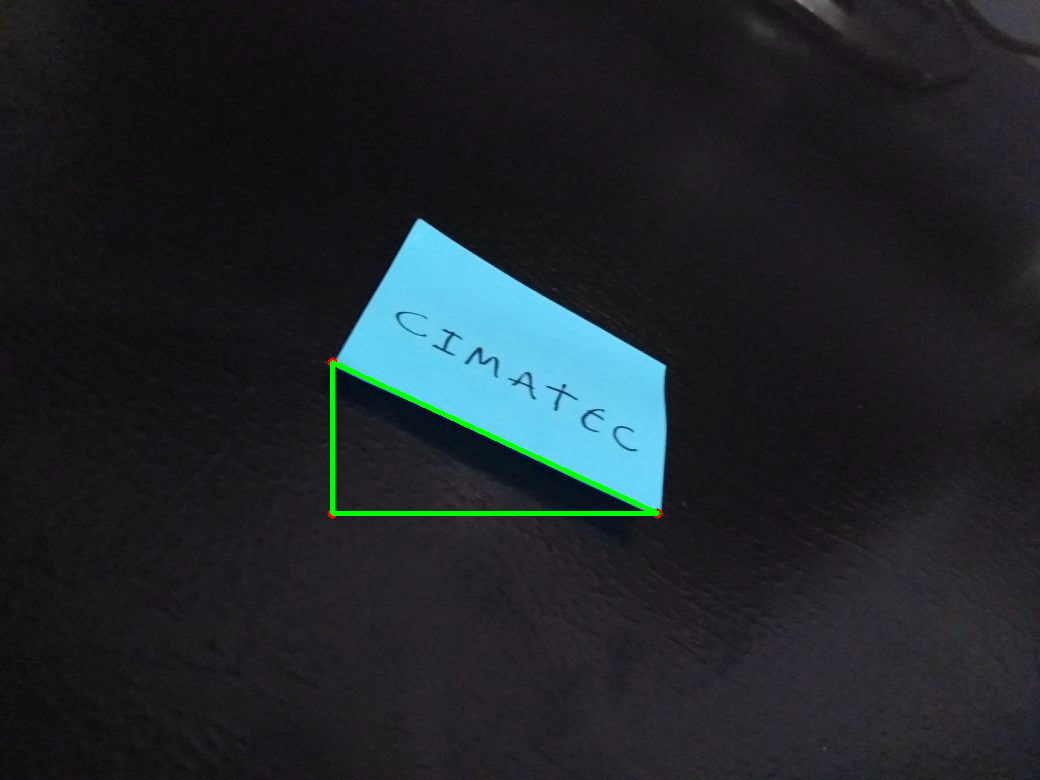

In [194]:
# Encontrando a largura da carta
import math
img = cv2.imread(local)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Encontrando um vetor auxiliar
cv2.circle(img,vet4,2,(0,0,255),5) # Vértice 4
cv2.circle(img,vet3,2,(0,0,255),5) # Vértice 3
vet_aux = vet3[0], vet4[1]
cv2.circle(img, vet_aux, 2, (0,0,255), 5) # Vértice auxiliar

# Traçando as linhas e encontrando um triangulo
cv2.line(img,vet4,vet3,(0,255,0),3) #hipotenusa
cv2.line(img,vet4,vet_aux,(0,255,0),3) # cateto 1
cv2.line(img,vet_aux,vet3,(0,255,0),3) # cateto 2

# Utilizando o teorema de pitagoras para encontrar a medida
cat_1 = vet4[0] - vet_aux[0]
cat_2 = vet3[1] - vet_aux[1]
print(cat_1)
print(cat_2)
width_aux = math.sqrt(math.pow(cat_1,2)+math.pow(cat_2,2))
width_aux = round(width_aux, 2)
print(width_aux)

cv2_imshow(img)

358
168


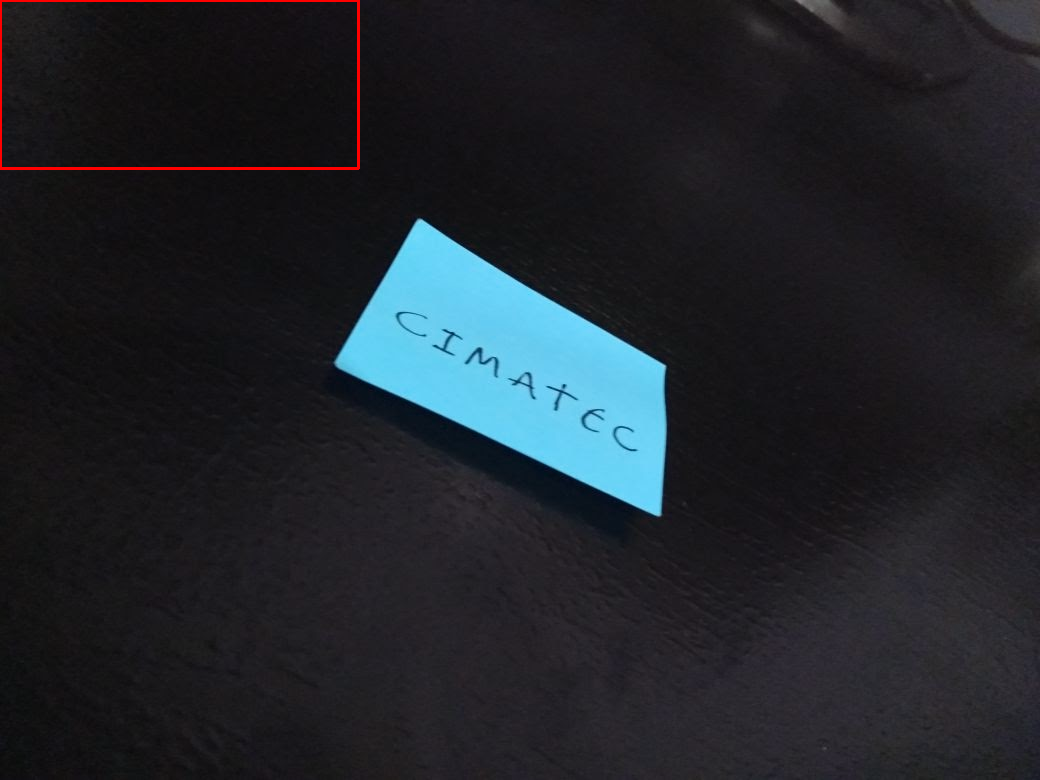

In [195]:
img = cv2.imread(local)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
width = round(width_aux)
height = round(height_aux)

print(width)
print(height)
# Coordenadas desejadas da projeção
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# Retângulo representando a posição desejada (VERMELHO)
cv2.rectangle(img,(0,0),(width,height),(0,0,255),2)

cv2_imshow(img)

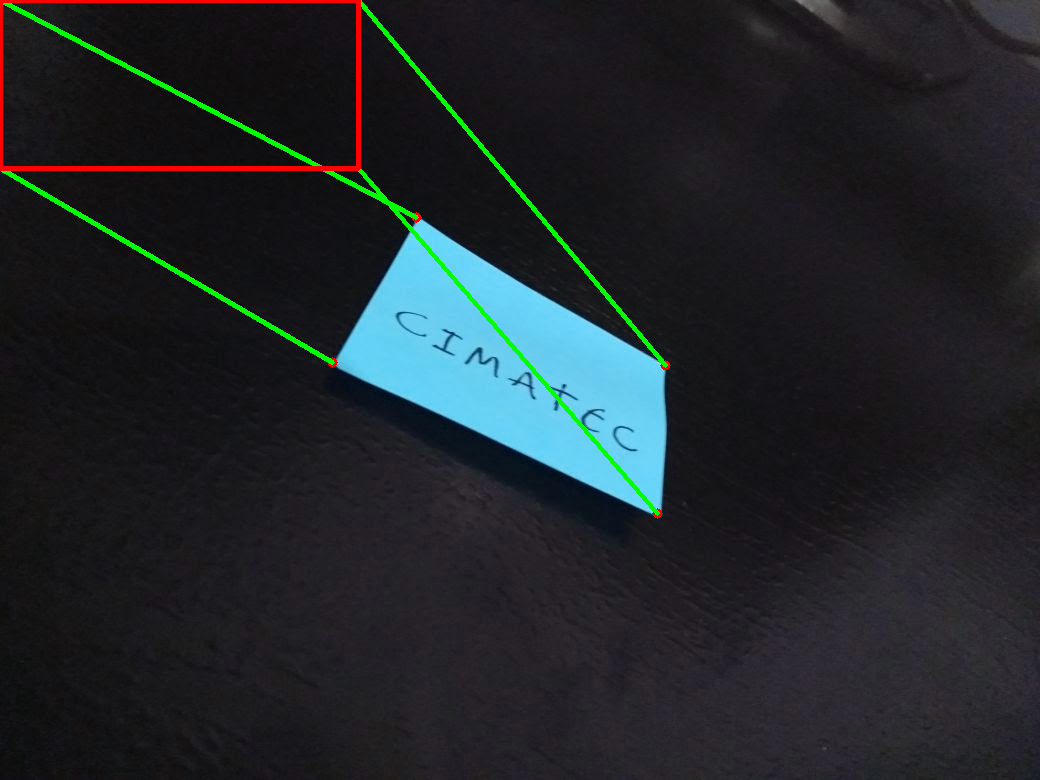

In [196]:
img = cv2.imread(local)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Coordenadas atuais dos 4 vértices
pts1 = np.float32([vet1,vet2,vet3,vet4])

# Coordenadas desejadas da projeção
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# Apenas para vizualização #
# Marcação dos 4 vértices (AZUL)
cv2.circle(img,vet1,2,(0,0,255),5) # Vértice 1
cv2.circle(img,vet2,2,(0,0,255),5) # Vértice 2
cv2.circle(img,vet3,2,(0,0,255),5) # Vértice 3
cv2.circle(img,vet4,2,(0,0,255),5) # Vértice 4
# Marcação das 4 linhas (VERDE)

cv2.line(img,(0,0),vet1,(0,255,0),3)
cv2.line(img,(width,0),vet2,(0,255,0),3)
cv2.line(img,(0,height),vet3,(0,255,0),3)
cv2.line(img,(width,height),vet4,(0,255,0),3)

# Retângulo representando a posição desejada (VERMELHO)
cv2.rectangle(img,(0,0),(width,height),(0,0,255),3)
# Apenas para vizualização #

cv2_imshow(img)

Imagem com distorção de perspectiva


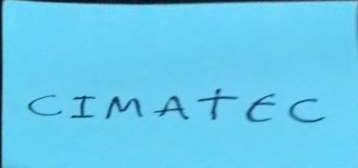

Imagem Original


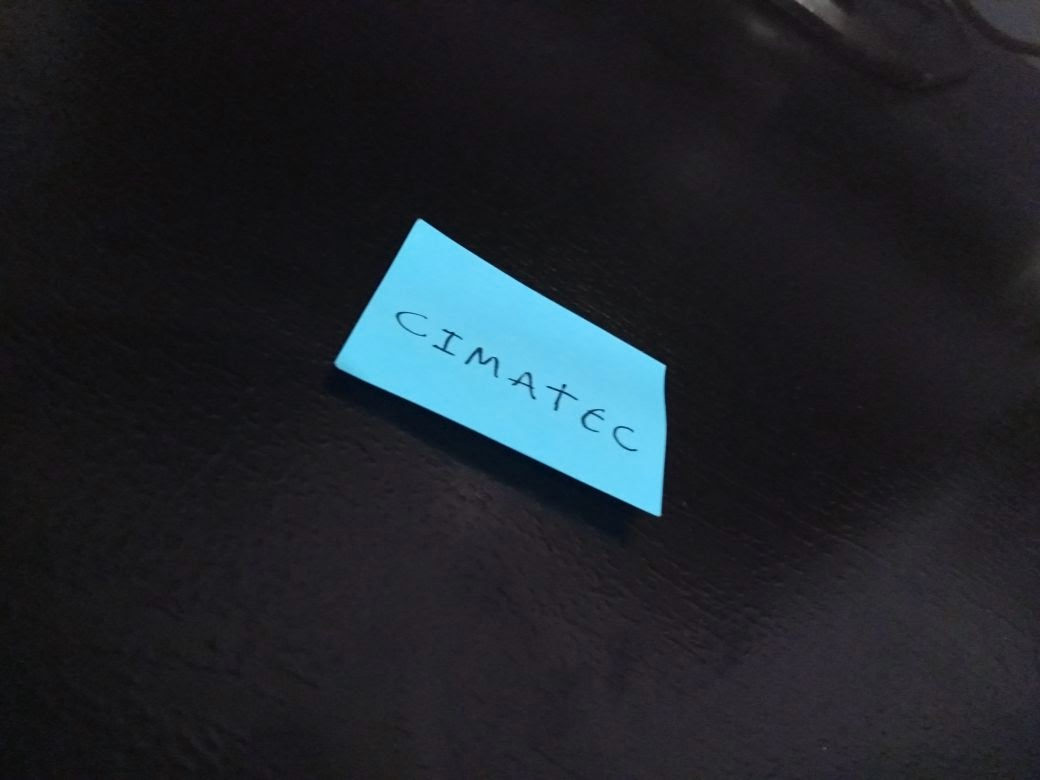

In [197]:
img = cv2.imread(local)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Coordenadas atuais dos 4 vértices
pts1 = np.float32([vet1,vet2,vet3,vet4])

# Coordenadas desejadas da projeção
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# Matriz de Transformação de Perspectiva
matrix = cv2.getPerspectiveTransform(pts1,pts2)

# Distorção de Perspectiva
imgOutput = cv2.warpPerspective(img,matrix,(width,height))

print("Imagem com distorção de perspectiva")
cv2_imshow(imgOutput)

print("Imagem Original")
cv2_imshow(img)

CLIMATEC



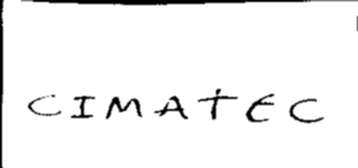

In [201]:
op1 = local == 'desafio-visão-2-1.jpeg'
op2 = local == 'desafio-visão-2-2.jpeg'
op3 = local == 'desafio-visão-2-3.jpeg'
img = cv2.imread(local)
placa = imgOutput.copy()
gray = cv2.cvtColor(imgOutput, cv2.COLOR_BGR2GRAY)
thresh = 255 - cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
thresh = cv2.GaussianBlur(thresh, (3,3), 0)
if op1 or op2:
  # Realiza a extração de texto
  extractedInformation = pytesseract.image_to_string(thresh)
  print(extractedInformation)

  cv2_imshow(thresh)

elif op3:
  img = thresh

  ret , thrash = cv2.threshold(thresh, 240 , 255, cv2.CHAIN_APPROX_NONE)
  contours , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

  for contour in contours:
      approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
      cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
      x = approx.ravel()[0]
      y = approx.ravel()[1] - 5
      if len(approx) == 3:
          cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
          #print('Triangle')
      elif len(approx) == 4 :
          x, y , w, h = cv2.boundingRect(approx)
          aspectRatio = float(w)/h
          #print(aspectRatio)
          if aspectRatio >= 0.95 and aspectRatio < 1.05:
              cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
              #print('square')

          else:
              cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
              #print('rectangle')

      elif len(approx) == 5 :
          cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
          #print('pentagon')
      elif len(approx) == 10 :
          cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
      else:
          cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
          #print('circle')
  cv2_imshow(img)